<a href="https://colab.research.google.com/github/lokita282/synapse-learning-period/blob/week4/Copy_of_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##Synthesize data
Synthetic data will be built using y = 2x + 3

In [ ]:
def synthetic_data(x1, x2, num_examples):
    X = np.random.normal(0, 1, (num_examples, len(x1)))
    y = np.dot(X, x1) + x2
    y += np.random.normal(0, 1, y.shape)
    return X, y.reshape((-1, 1))

In [ ]:
x,y = synthetic_data(np.array([2]), 3, 1000)

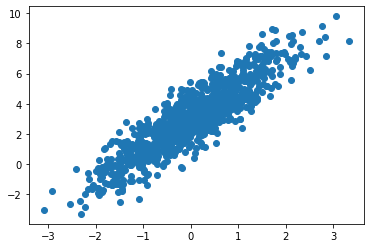

In [ ]:
plt.scatter(x,y)

## Initialize random x1 and x2 for your line

In [ ]:
x1_init = np.random.random(x.shape[1]) #Initial value of theta0
x2_init = np.random.random(x.shape[1]) #Initial value of theta1

In [ ]:
print(x1_init, x2_init)

[0.47552243] [0.18165557]


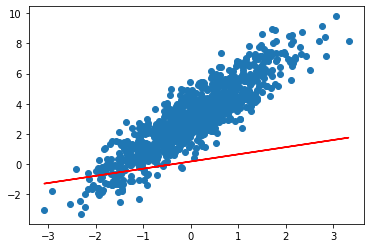

In [ ]:
plt.figure()
plt.scatter(x,y)
plt.plot(x, x1_init*x+x2_init, 'r')
plt.show()

## Loss Function
We will use the mean squared error as Loss function

In [ ]:
def mse(x1, x2, scatter_x, scatter_y):
  n = len(scatter_x)
  J = sum([(scatter_x[i]*x1 + x2 - scatter_y[i])**2 for i in range(n)])
  return J/n

In [ ]:
mse(x1_init, x2_init, x,y)

array([11.29032967])

## Visualizing the loss function

In [ ]:
def plot_mse(scatter_x, scatter_y):
  x1 = np.random.normal(0, 7, (2000,1))
  x2 = np.random.normal(0, 7, (2000,1))
  mse_wrt_x1 = [mse(i,x2[0],scatter_x,scatter_y) for i in x1]
  mse_wrt_x2 = [mse(x1[0],i,scatter_x,scatter_y) for i in x2]
  _, ax = plt.subplots(1,2,figsize=(20,10))

  ax[0].plot(x1, mse_wrt_x1)
  ax[0].set_title("mse x1")

  ax[1].plot(x2, mse_wrt_x2)
  ax[1].set_title("mse x2")

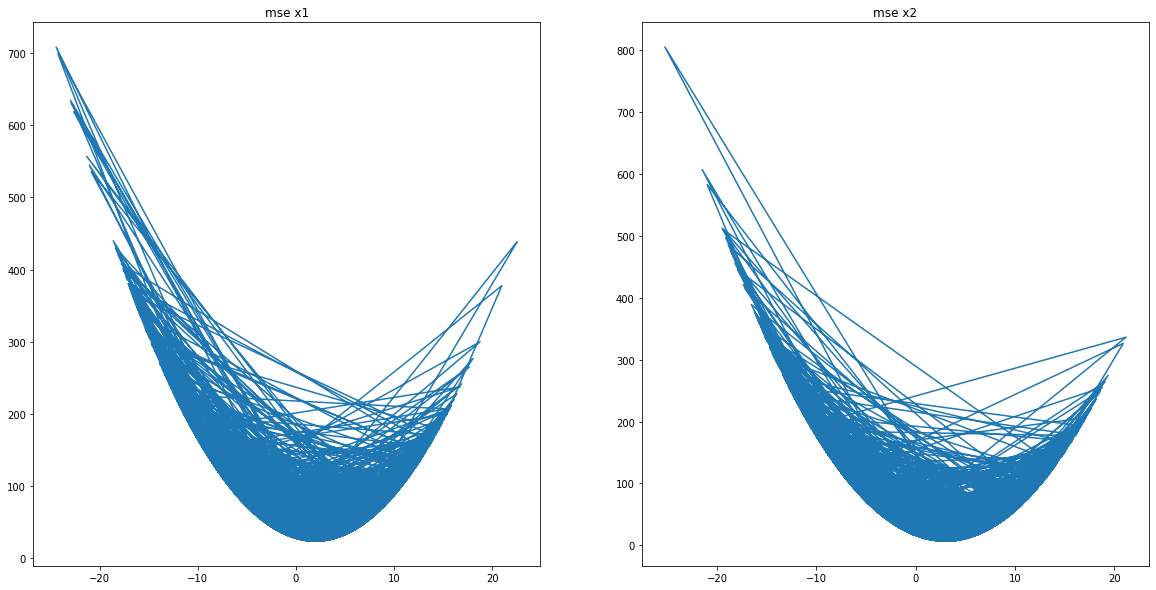

In [ ]:
plot_mse(x,y)

x1 minima will be at 2<br>
x2 minima will be at 3

## Optimizer and training

In [ ]:
def gradient_descent(lr, scatter_x, scatter_y, x1, x2, epochs):
  J_list = []
  n = len(scatter_x)
  line_list = []

  for i in range(epochs+1):
    if i%50 == 0:
      print("epoch:", i)

    loss = mse(x1, x2, scatter_x, scatter_y)
    J_list.append(loss)
    if i%50 ==0:
      print("mse:", loss)

    dx1 = 2/n*(sum([(scatter_x[i]*x1 + x2 - scatter_y[i])*scatter_x[i] for i in range(n)]))
    dx2 = 2/n*(sum([(scatter_x[i]*x1 + x2 - scatter_y[i]) for i in range(n)]))

    x1 = x1 - lr*dx1
    x2 = x2 - lr*dx2

    line_list.append((x1,x2))
    if i%50 == 0:
      print()

  return x1, x2, line_list, J_list


In [ ]:
predicted_x1, predicted_x2, line_list, J_list =  gradient_descent(0.01, x,y,x1_init, x2_init, 300)

epoch: 0
mse: [11.29032967]

epoch: 50
mse: [2.36688708]

epoch: 100
mse: [1.16471491]

epoch: 150
mse: [1.00269072]

epoch: 200
mse: [0.98084467]

epoch: 250
mse: [0.9778979]

epoch: 300
mse: [0.97750025]



In [ ]:
predicted_x1, predicted_x2

(array([1.99530481]), array([3.01602983]))

In [ ]:
2, 3

(2, 3)

# visualizing results

#### Cost function vs epoch

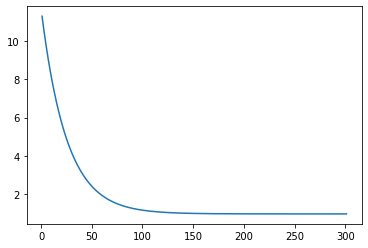

In [ ]:
plt.plot([i for i in range(1,302)], J_list)

#### Final predicted best fit line

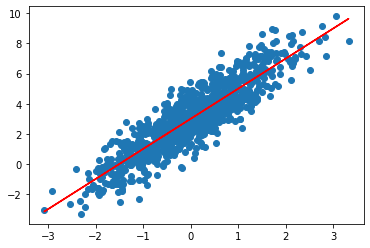

In [ ]:
plt.figure()
plt.scatter(x,y)
plt.plot(x, predicted_x1*x+predicted_x2, 'r')
plt.show()

#### Visualizing the progress with epochs

Text(0.5, 1.0, 'epoch 160')

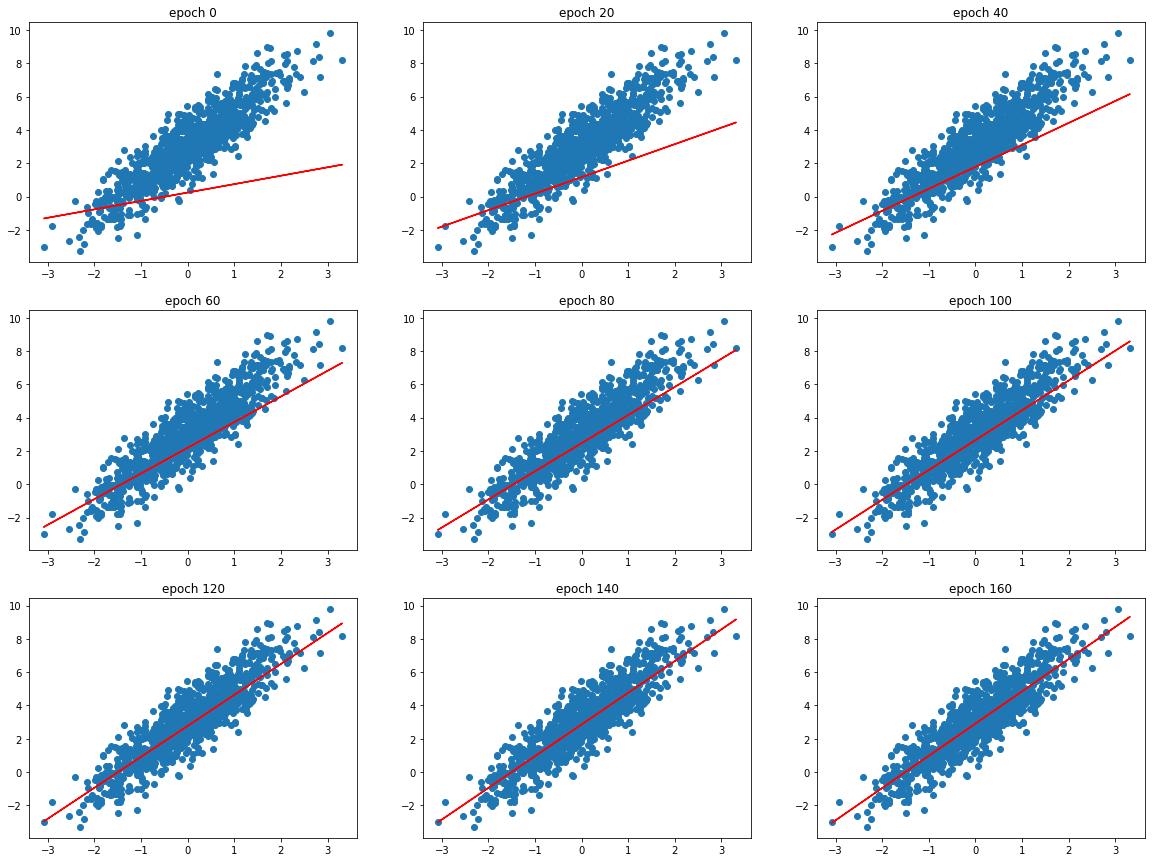

In [ ]:
_, axarr = plt.subplots(3,3,figsize=(20,15))

axarr[0][0].scatter(x,y)
axarr[0][0].plot(x, line_list[0][0]*x+line_list[0][1], 'r')
axarr[0][0].set_title("epoch 0")

axarr[0][1].scatter(x,y)
axarr[0][1].plot(x, line_list[20][0]*x+line_list[20][1], 'r')
axarr[0][1].set_title("epoch 20")

axarr[0][2].scatter(x,y)
axarr[0][2].plot(x, line_list[40][0]*x+line_list[40][1], 'r')
axarr[0][2].set_title("epoch 40")

axarr[1][0].scatter(x,y)
axarr[1][0].plot(x, line_list[60][0]*x+line_list[60][1], 'r')
axarr[1][0].set_title("epoch 60")

axarr[1][1].scatter(x,y)
axarr[1][1].plot(x, line_list[80][0]*x+line_list[80][1], 'r')
axarr[1][1].set_title("epoch 80")

axarr[1][2].scatter(x,y)
axarr[1][2].plot(x, line_list[100][0]*x+line_list[100][1], 'r')
axarr[1][2].set_title("epoch 100")

axarr[2][0].scatter(x,y)
axarr[2][0].plot(x, line_list[120][0]*x+line_list[120][1], 'r')
axarr[2][0].set_title("epoch 120")

axarr[2][1].scatter(x,y)
axarr[2][1].plot(x, line_list[140][0]*x+line_list[140][1], 'r')
axarr[2][1].set_title("epoch 140")

axarr[2][2].scatter(x,y)
axarr[2][2].plot(x, line_list[160][0]*x+line_list[160][1], 'r')
axarr[2][2].set_title("epoch 160")